In [1]:
import cv2
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

All the data files are saved in the folder 'data/'.

In [2]:
# read the list of training images
train_list = pd.read_csv("data/stage1_train_labels.csv")
train_list.shape

(29461, 2)

In [3]:
train_list.head()

,ImageId,EncodedPixels
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...
1,00071198d059ba7f5914a526d124d28e6d010c92466da2...,36269 7 36523 11 36778 13 37033 15 37288 17 37...
2,00071198d059ba7f5914a526d124d28e6d010c92466da2...,19919 6 20174 8 20429 10 20685 11 20941 12 211...
3,00071198d059ba7f5914a526d124d28e6d010c92466da2...,18671 6 18926 8 19181 9 19436 10 19691 11 1994...
4,00071198d059ba7f5914a526d124d28e6d010c92466da2...,40158 3 40413 5 40669 5 40925 5 41182 3


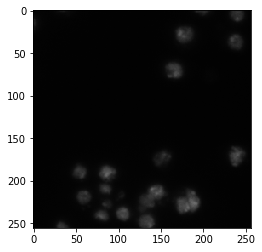

In [24]:
# try to read the first image
first_image_id = train_list['ImageId'][0]
image_path = 'data/stage1_train/' + first_image_id + '/images/' + first_image_id + '.png'

# read color image
image1 = cv2.imread(image_path, cv2.IMREAD_COLOR)
plt.imshow(image1)

In [21]:
image1.shape

(256, 256, 3)

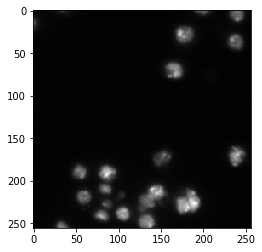

In [27]:
# read gray scale
image1_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image1, cmap='gray')

In [23]:
image1.shape

(256, 256, 3)

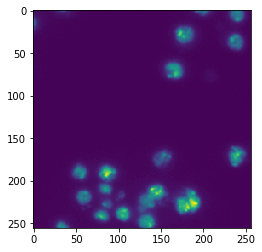

In [30]:
# actually it is the first layer (blue channel)?
plt.imshow(image1)

In [31]:
# check the masks
mask_path = 'data/stage1_train/' + first_image_id + '/masks/'

In [32]:
# for this example, try to read all filenames first
filenames = []
for filename in os.listdir(mask_path):
    filenames.append(filename)

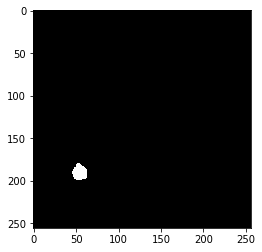

In [33]:
# read a mask
mask1 = cv2.imread(mask_path + filenames[0], cv2.IMREAD_GRAYSCALE)
plt.imshow(mask1, cmap='gray')

In [36]:
# let's read all the masks and show them in one image
all_masks_1 = np.zeros(image1.shape[:2])

for i in range(len(filenames)):
    img = cv2.imread(mask_path + filenames[i], cv2.IMREAD_GRAYSCALE)
    all_masks_1 = np.maximum(all_masks_1, img)

Text(0.5,1,u'masks')

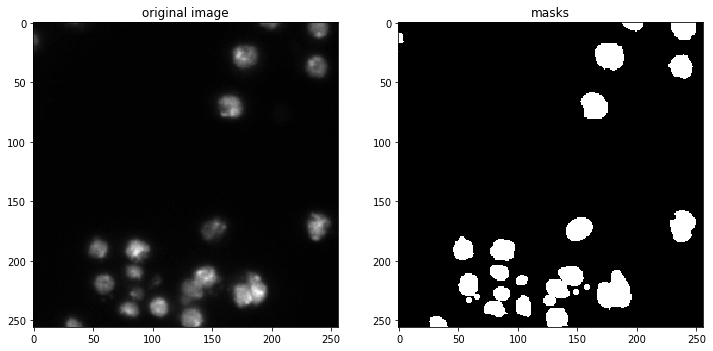

In [37]:
fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(121)
plt.imshow(image1_gray, cmap = 'gray')
ax1.set_title('original image')

ax2 = fig.add_subplot(122)
plt.imshow(all_masks_1, cmap = 'gray')
ax2.set_title('masks')